In [28]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)


In [29]:
merged_df=ride_df.merge(city_df,on='city')
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

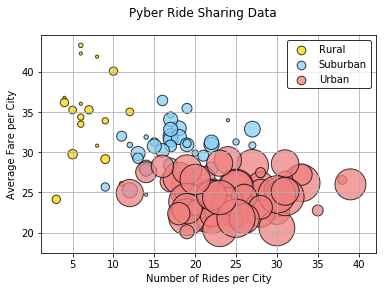

In [36]:
rural = merged_df.loc[merged_df['type']=='Rural']
suburban = merged_df.loc[merged_df['type']=='Suburban']
urban = merged_df.loc[merged_df['type']=='Urban']

rural_city_rides = rural.groupby('city').count()['ride_id']
suburban_city_rides = suburban.groupby('city').count()['ride_id']
urban_city_rides = urban.groupby('city').count()['ride_id']


rural_city_ave = rural.groupby('city').mean()['fare']
suburban_city_ave = suburban.groupby('city').mean()['fare']
urban_city_ave = urban.groupby('city').mean()['fare']

rural_driver_count = rural.groupby('city').mean()['driver_count']
suburban_driver_count = suburban.groupby('city').mean()['driver_count']
urban_driver_count = urban.groupby('city').mean()['driver_count']

plt.scatter(rural_city_rides , rural_city_ave , s = rural_driver_count*10, marker="o", color="gold",edgecolor = 'black', label = 'Rural', alpha=.75)
plt.scatter(suburban_city_rides , suburban_city_ave ,s = suburban_driver_count*10, marker="o", color="lightskyblue",edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban_city_rides , urban_city_ave ,s = urban_driver_count*20, marker="o", color="lightcoral",edgecolor = 'black', label = 'Urban', alpha = .75)

plt.suptitle('Pyber Ride Sharing Data')

plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.grid()
plt.show()

In [31]:
# Show plot
plt.show()

## Total Fares by City Type

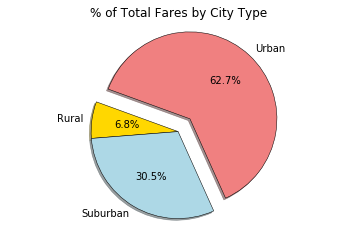

In [37]:
fare_sum = merged_df.groupby('type').sum()["fare"]

labels = fare_sum.index
colors = ["gold", "lightblue", "lightcoral"]
explode = (0, 0, 0.2)

plt.title('% of Total Fares by City Type')
plt.axis('equal')

plt.pie(fare_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=160,wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.show()




In [33]:
# Show Figure
plt.show()

## Total Rides by City Type

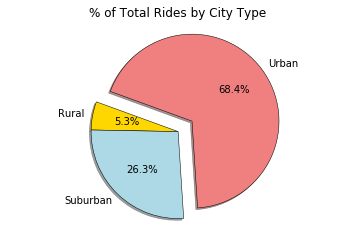

In [42]:
ride_sum = merged_df.groupby('type').count()["ride_id"]

labels = ride_sum.index
colors = ["gold", "lightblue", "lightcoral"]
explode = (0, 0, 0.2)

plt.title('% of Total Rides by City Type')
plt.axis('equal')

plt.pie(ride_sum, shadow=True,startangle=160,explode=explode, labels=labels, colors=colors,autopct="%1.1f%%",wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.show()


In [26]:
# Show Figure
plt.show()

## Total Drivers by City Type

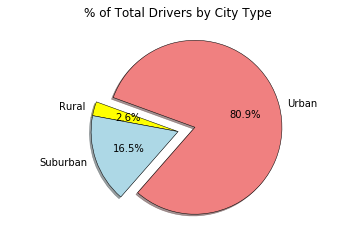

In [27]:
driver_count = merged_df.drop_duplicates('city', keep = 'first').groupby('type')
driver_count.head()

driver_sum = driver_count.sum()['driver_count']

labels = driver_sum.index
colors = ["yellow", "lightblue", "lightcoral"]
explode = (0, 0, 0.2)

plt.title('% of Total Drivers by City Type')
plt.axis('equal')

plt.pie(driver_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=160,wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.show()


In [35]:
# Show Figure
plt.show()